In [1]:
from keras.models import Sequential
#from keras.layers import Conv2D
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#adding 3rd layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 8,
                                            class_mode = 'categorical')




Found 2283 images belonging to 4 classes.
Found 1395 images belonging to 4 classes.


In [4]:
training_set.image_shape
test_set.image_shape

(64, 64, 3)

In [5]:
training_set.class_indices
test_set.class_indices

{'Lung_Cancer': 0, 'PNEUMONIA': 1, 'covid': 2, 'normal': 3}

In [7]:
plot_compare = classifier.fit(training_set,
                 steps_per_epoch = 50,
                 epochs = 10,
                 validation_data = test_set,
                 validation_steps = 20)

from keras.models import load_model
classifier.save("DCPL.h5")

Epoch 1/10
50/50 [==============================] - 14s 277ms/step - loss: 0.3980 - accuracy: 0.8375 - val_loss: 0.3693 - val_accuracy: 0.8562
Epoch 2/10
50/50 [==============================] - 15s 301ms/step - loss: 0.2743 - accuracy: 0.8950 - val_loss: 0.4063 - val_accuracy: 0.9125
Epoch 3/10
50/50 [==============================] - 17s 336ms/step - loss: 0.2367 - accuracy: 0.9150 - val_loss: 0.4055 - val_accuracy: 0.9000
Epoch 4/10
50/50 [==============================] - 20s 393ms/step - loss: 0.2078 - accuracy: 0.9200 - val_loss: 0.3576 - val_accuracy: 0.9375
Epoch 5/10
50/50 [==============================] - 18s 367ms/step - loss: 0.2235 - accuracy: 0.9225 - val_loss: 0.4430 - val_accuracy: 0.9125
Epoch 6/10
50/50 [==============================] - 14s 288ms/step - loss: 0.3133 - accuracy: 0.8975 - val_loss: 0.4322 - val_accuracy: 0.8938
Epoch 7/10
50/50 [==============================] - 14s 281ms/step - loss: 0.2393 - accuracy: 0.9190 - val_loss: 0.3714 - val_accuracy: 0.9187

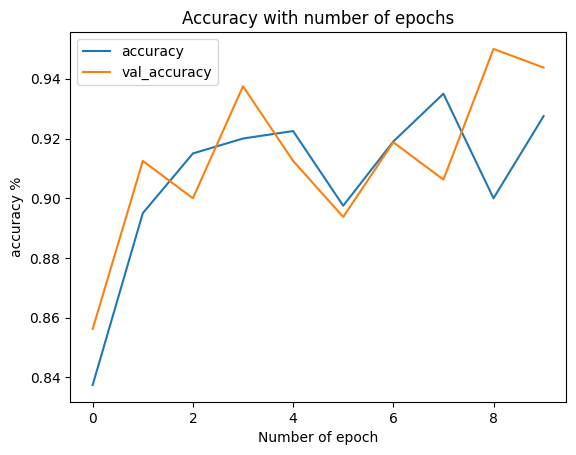

In [8]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['accuracy'])
pllt.plot(plot_compare.history['val_accuracy'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['accuracy', 'val_accuracy'])
pllt.show()

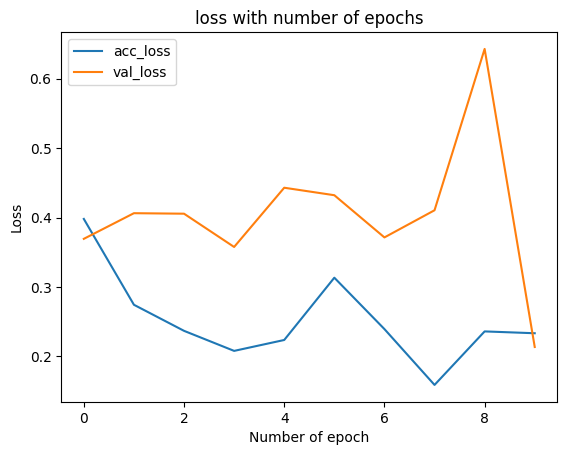

In [9]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['acc_loss', 'val_loss'])
pllt.show()